#### Etapa preliminar - Equação de advecção pura 

Desenvolver um sistema para resolução da equação de advecção pura, para melhor compreensão das ferramentas necessárias e do método 

Equação avecção pura 1-D:

\begin{equation}
    \frac{dC}{dt} + c\frac{dC}{dx} = 0
\end{equation}

Solução analítica:

\begin{equation}
    C(x,t) = C_{0}(x - ct)
\end{equation}

Condição inicial:

\begin{equation}
    C(x,t=0) = C_{0}(t)
\end{equation}

Condição de contorno:

\begin{equation}
    C(x=x_{inicial},t) = 0
\end{equation}

\begin{equation}
    C(x=x_{final}, t) = 0
\end{equation}






In [23]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from sympy import *
import pandas as pd


In [2]:
# Teste de estabilidade - número de Courant = velocidade *(dt/dx) <= 1

# dt - passo no tempo; tmax - tempo máximo de análise; x0 - posição inicial; n - número de passos de tempo dentro do tmax; u - velocidade
def courant(dt, tmax,x0, u):

    n = round(tmax/dt)

    dx = (tmax - x0) /n

    C = u * (dt/dx)

    if C>1:
        return print('Unstable, reduce dt', dx )
    if C <= 1:
        return print('Stable', dx)

courant(0.0001,100.0,0., 1.0)

Stable 0.0001


In [24]:
# Resolução analítica
# Malha
x0 =0
L = 100.0
t_max = 100.0
t0 = 0

dx = 0.1
dt = 0.1

x = np.arange(x0, L, dx)
t = np.arange(0, t_max, dt)


# Constantes do sistema
u = 0.5

# Condição inicial 

C_0 = 0

# Condição de contorno

C_x0 = 0
C_xn = 0

C_adveccao_results = np.empty_like(t)

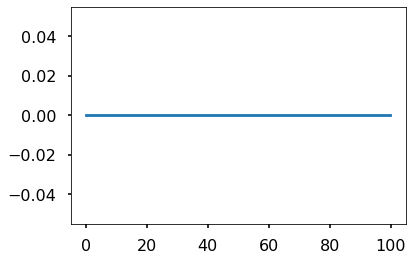

In [25]:
contmax = len(t)
       
while t0 < t_max:
    for i in range (len(t)):
             
        C_adveccao = C_0 * (x[i] - u*t[i])
        
        if i == len(t-1):
            C_adveccao = C_xn
            C_adveccao_results[i] = C_adveccao  # não está funcionando entender o pq ,mas a equação foi resolvida

        else:
            C_adveccao_results[i] = C_adveccao 
        
       
        t0 = t0 + dt
    


plt.plot(t, C_adveccao_results)


In [ ]:
# Solução numérica

# TDMA solver

# Malha
x0 =0
L = 100.0
nx = 100.0 # number of nodes
t_max = 100.0
nt = 100.0
t0 = 0

dx = L/ nx
dt = t_max / nt

x = np.arange(x0, L, dx)
t = np.arange(0, t_max, dt)


# Constantes do sistema
u = 0.5

# Condição inicial 

C_0 = 10

# Condição de contorno

C_x0 = 0
C_xn = 0

n = len(t) # numeros de elementos nas diagonais

# lista/array vazio para cada elemento 

D = np.zeros(n) # valores da diagonal principal
beta = np.zeros(n) # valores da diagonal inferior - lembrar que beta é 0 na primeira iteração
alfa = np.zeros(n) # valores da diagonal superior - lembrar que alfa é 0 na ultima iteração
k = np.zeros(n) # valores da constante à direita - solução

X = np.zeros(n)

def tdma(a, b, c, d):
    """Solution of a linear system of algebraic equations with a
        tri-diagonal matrix of coefficients using the Thomas-algorithm.

    Args:
        a(array): an array containing lower diagonal (a[0] is not used)
        b(array): an array containing main diagonal 
        c(array): an array containing lower diagonal (c[-1] is not used)
        d(array): right hand side of the system
    Returns:
        x(array): solution array of the system
    
    """
    
    n = len(b)
    x = np.zeros(n)
    
    # elimination:
    
    for k in range(1,n):
        q = a[k]/b[k-1]
        b[k] = b[k] - c[k-1]*q
        d[k] = d[k] - d[k-1]*q
    
    # backsubstitution:
    
    q = d[n-1]/b[n-1]
    x[n-1] = q
    
    for k in range(n-2,-1,-1):
        q = (d[k]-c[k]*q)/b[k]
        x[k] = q
    
    
    return x

#### Trabalho 3

Desenvolver um modelo numérico 1D para estudar o transporte de sal. O modelo
desenvolvido deve ser aplicado em um canal com geometrias:

    Extensão de 100900,0 m

    1000,0 m de largura 

    Seção transversal retangular

    4,0 m de profundidade

    Na entrada do canal há uma contração localizada à 400,0 m da seção 1 (L1). A contração possui 500,0 m de extensão e largura 

#### Solução analítica

A equação de advecção-difusão 1D:


\begin{equation}
    \frac{dC}{dt} + c\frac{dC}{dx} = D*\frac{d^{2}C}{dx^{2}}
\end{equation}

Com as seguintes condições iniciais e de contorno:

\begin{equation}
    C(x,t=0) = C_{0}(t)
\end{equation}

Condição de contorno:

\begin{equation}
c(0, t)=\left\{\begin{array}{lc}c_{0} & 0 < t < t_{0} \\
0 & t>t_{o}\end{array}\right.
\end{equation}

\begin{equation}
\frac{\partial c}{\partial x}(\infty, t)=0
\end{equation}




Solução :

\begin{equation}
\begin{aligned}
&c(x, t)=\\ &\left\{\begin{array}{l}\frac{\gamma}{\mu}+\left(C_{i}-\frac{\gamma}{\mu}\right)*A(x, t)+\left(C_{0}-\frac{\gamma}{\mu}\right)*B(x, t) & 0 < t < t_{0} \\
\frac{\gamma}{\mu}+\left(C_{i}-\frac{\gamma}{\mu}\right) * A(x, t)+\left(C_{0}-\frac{\gamma}{\mu}\right)* B(x, t)-C_{0} *B\left(x, t-t_{0}\right) & t>t_{0}\end{array}\right.
\end{aligned}
\end{equation}

Onde

A(x,t):

\begin{equation}
\begin{aligned}
A(x, t)=\exp (-\mu t / R)\left\{1-\frac{1}{2} \operatorname{erfc}\left[\frac{\mathrm{Rx}-\mathrm{v} t}{2(\mathrm{DRt})^{1 / 2}}\right]\right.\\
&-\frac{1}{2} \exp (\mathrm{vx} / \mathrm{D}) \operatorname{erfc} \left[\frac{\mathrm{Rx}+\mathrm{v} t}{2(\mathrm{DRt})^{1 / 2}}\right]

\end{aligned}
\end{equation}

B(x,t):


\begin{equation}
\begin{aligned}
B(x, t) &=\frac{1}{2} \exp \left[\frac{(v-u) x}{2 D}\right] \operatorname{erfc}\left[\frac{R x-u t}{2(D R t)^{1 / 2}}\right] \\
&+\frac{1}{2} \exp \left[\frac{(v+u) x}{2 D}\right] \operatorname{erfc}\left[\frac{R x+u t}{2(D R t)^{1 / 2}}\right]
\end{aligned}
\end{equation}

\begin{equation}
u=v\left(1+\frac{4 \mu \mathrm{D}}{v^{2}}\right)^{1 / 2}
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.function_base import copy

n = 81
L = 1.0
x = np.linspace(0,L,n)
dx = L/(n-1)
assert(dx == x[1]-x[0])

w = 2.0*np.pi
mu = 0.05
c = 1.0 # wave speed
u0 = lambda x: np.sin(w*x)
uexact = lambda x,t: u0(x-c*t) * np.exp(-mu*w*w*t)

dt = 0.001
tend = 1.0
t = 0

cfl = c*dt/2.0/dx
nfl = mu*dt/dx/dx
sol = []
sol.append(u0)

while t < tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1] = un[1:-1] - cfl * (un[2:] - un[:-2]) + nfl*(un[2:] - 2.0*un[1:-1] + un[:-2])
    unew[-1] = un[-1] - cfl * (un[1] - un[-2]) + nfl*(un[-2] - 2.0*un[-1] + un[1])
    unew[0] = unew[-1]
    sol.append(unew)
    t += dt